In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sql_functions import read_query

In [2]:
query = "select * from customers limit 4"

In [3]:
read_query(query)

,CustomerID,FirstName,LastName,Email,Phone,Address,State
0,C-2023-100-1,Mahika,Sunder,MahikaSunder_11@zmail.com,03412176590,"H.No. 155, Chana",Assam
1,C-2023-100-10,Zeeshan,Vasa,ZeeshanVasa_1@zmail.com,+911151051656,"52, Roy Nagar",Tripura
2,C-2023-100-100,Aaina,Sachdeva,AainaSachdeva_9@zmail.com,+918834507719,"75/92, Kade Marg",Nagaland
3,C-2023-100-101,Shray,Bajwa,ShrayBajwa_11@zmail.com,07410498662,"45, Bora Ganj",Manipur


In [4]:
query = "show tables"
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [5]:
query = "select * from salesdata limit 4"
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00


In [6]:
query = """select sd.customerid , c.firstname , sd.saledate , sd.totalprice
        from customers as c
        join salesdata as sd    
        on c.customerid = sd.customerid
        limit 5"""

In [7]:
read_query(query)

,customerid,firstname,saledate,totalprice
0,C-2023-100-1,Mahika,2023-07-22,67312.00
1,C-2023-100-1,Mahika,2023-05-23,176466.00
2,C-2023-100-1,Mahika,2023-11-26,190332.00
3,C-2023-100-1,Mahika,2023-03-31,205080.00
4,C-2023-100-1,Mahika,2023-11-22,14174.00


In [8]:
query = """
select t.customerid , c.firstname , t.expenditure 
from  
(select customerid ,
sum(totalprice) as expenditure
        from salesdata 
        group by customerid) as t
join customers as c
on t.customerid = c.customerid
limit 10;"""

In [9]:
top_10_annual_customers = read_query(query)

In [10]:
top_10_annual_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerid   10 non-null     object
 1   firstname    10 non-null     object
 2   expenditure  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [11]:
top_10_annual_customers["expenditure"].dtype

dtype('O')

In [12]:
top_10_annual_customers["expenditure"].values

array([Decimal('9933032.00'), Decimal('9779316.00'),
       Decimal('9889393.00'), Decimal('9168084.00'),
       Decimal('10315608.00'), Decimal('6676018.00'),
       Decimal('9002667.00'), Decimal('9416623.00'),
       Decimal('9290207.00'), Decimal('6842296.00')], dtype=object)

In [13]:
top_10_annual_customers["expenditure"] = top_10_annual_customers["expenditure"].astype(float)

In [14]:
top_10_annual_customers["expenditure"].dtype

dtype('float64')

In [15]:
expenditure1 = top_10_annual_customers["expenditure"].values

In [16]:
customer_names =top_10_annual_customers["firstname"].values

In [17]:
cmap_values = np.linspace(0.3,1,10)

In [18]:
cmap = plt.cm.PuBuGn(cmap_values)

<h1 style="color : red">Plotting a bar graph - using cmap and annotation 

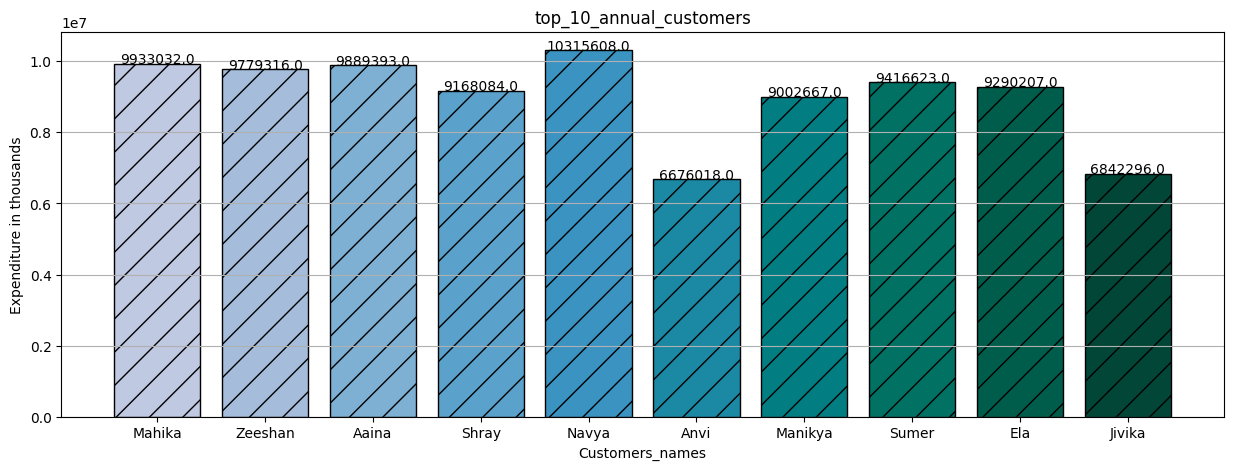

In [19]:
plt.figure(figsize =(15,5))
plt.title("top_10_annual_customers")
plt.xlabel("Customers_names")
plt.ylabel("Expenditure in thousands")
plt.bar( x = customer_names , height = expenditure1 , color = cmap , edgecolor = "black", hatch = "/")
for i in range(len(customer_names)):
    plt.annotate(text = f'{expenditure1[i]}' , xy = (i,expenditure1[i]+5) , horizontalalignment = "center")
plt.grid(axis = "y")
plt.savefig("top_10_annual_customers.jpeg")

In [20]:
query = """ show tables"""
read_query(query)

,Tables_in_swiftmarket
0,categories
1,customers
2,employees
3,salesdata
4,subcategories
5,suppliers


In [21]:
query =""" select * from salesdata limit 5"""
read_query(query)

,SaleID,CustomerID,SubcatID,EmployeeID,SaleDate,Quantity,TotalPrice
0,23000,C-2023-100-12,6002,1100,2023-05-02,2,176432.00
1,23001,C-2023-100-141,6029,1115,2023-12-26,2,47172.00
2,23002,C-2023-100-86,6029,1035,2023-03-26,2,47172.00
3,23003,C-2023-100-72,6006,1016,2023-08-01,2,117644.00
4,23004,C-2023-100-142,6030,1067,2023-03-06,5,336560.00


In [22]:
# in the month of january which employee how much sales he did 

In [23]:
query = """ select monthname(s.SaleDate) as monthname ,
 e.firstname , sum(s.totalprice) as total_Sale_in_january
from salesdata as s
join employees as e
on s.employeeid = e.employeeid
where monthname(s.SaleDate) = "January"
group by monthname(s.SaleDate) , e.firstname
order by total_Sale_in_january desc
limit 10;
"""

df = read_query(query= query)

In [24]:
df

,monthname,firstname,total_Sale_in_january
0,January,Bhavin,5775952.00
1,January,Nitara,5567036.00
2,January,Myra,4888628.00
3,January,Renee,3924716.00
4,January,Shray,3719152.00
5,January,Yuvaan,3348039.00
6,January,Anika,3152408.00
7,January,Kiaan,3136727.00
8,January,Yasmin,3135779.00
9,January,Hiran,3104523.00


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   monthname              10 non-null     object
 1   firstname              10 non-null     object
 2   total_Sale_in_january  10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes


In [26]:
df["total_Sale_in_january"] = df["total_Sale_in_january"].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthname              10 non-null     object 
 1   firstname              10 non-null     object 
 2   total_Sale_in_january  10 non-null     float64
dtypes: float64(1), object(2)
memory usage: 372.0+ bytes


In [28]:
name_of_employees = df["firstname"].values

total_sale = df["total_Sale_in_january"].values

In [29]:
cm_values = np.linspace(0.3,1,10)
cm = plt.cm.Spectral(cm_values)

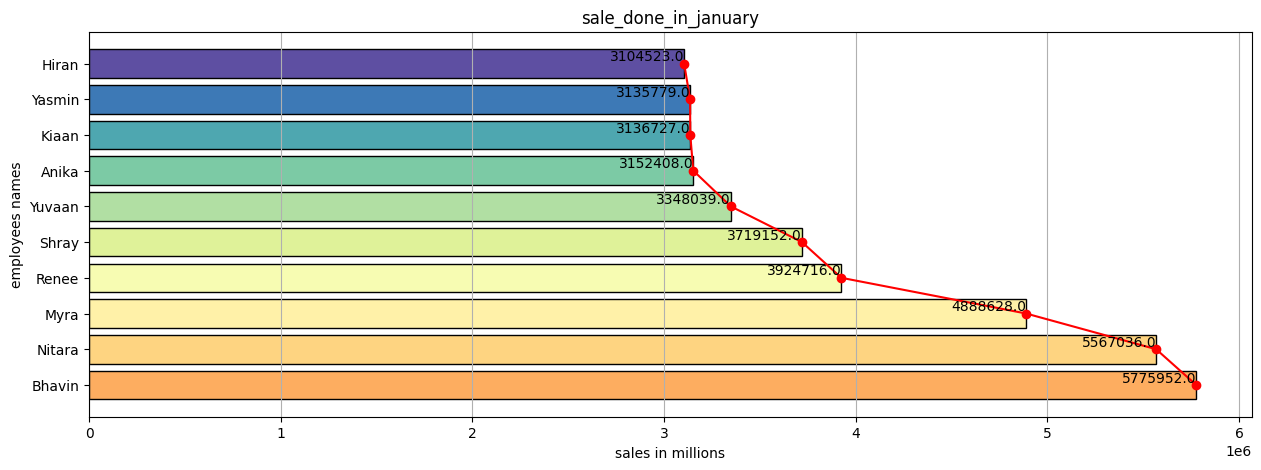

In [30]:
plt.figure(figsize =(15,5))

plt.plot(total_sale,name_of_employees , marker = "o" , color = "red")
plt.barh(y = name_of_employees , width = total_sale, color = cm , edgecolor = "black")
for i in range(len(total_sale)):
    plt.annotate(text = total_sale[i] , xy = (total_sale[i] , i) , horizontalalignment = "right",
                  verticalalignment = "bottom")


plt.title("sale_done_in_january")
plt.xlabel("sales in millions")
plt.ylabel("employees names")

plt.grid(axis = "x")



In [32]:
query = """ select t.month_name , t.monthlysales
from
(select month(saledate) as month_number ,
monthname(saledate) as month_name,
 sum(totalprice) as monthlysales
from salesdata
group by month(saledate) , monthname(saledate)
order by month(saledate)) as t;"""

df = read_query(query)

In [33]:
df

,month_name,monthlysales
0,January,155340130.00
1,February,140345189.00
2,March,151612551.00
3,April,150691604.00
4,May,163734120.00
5,June,143529379.00
6,July,149811843.00
7,August,158477094.00
8,September,146743920.00
9,October,143488837.00


In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month_name    12 non-null     object
 1   monthlysales  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


In [41]:
monthname = df["month_name"].values
df["monthlysales"] = df["monthlysales"].astype(float)
monthlysales = df["monthlysales"].values

In [74]:
avgsales = df["monthlysales"].mean()
print(avgsales)

149106174.0


In [80]:
# goalline - it is the profit we should have to cover all the expenses:
goal_line = avgsales*1.05


<h1 style = "color : Blue">Provide a visual representation of our annual sales performance over time

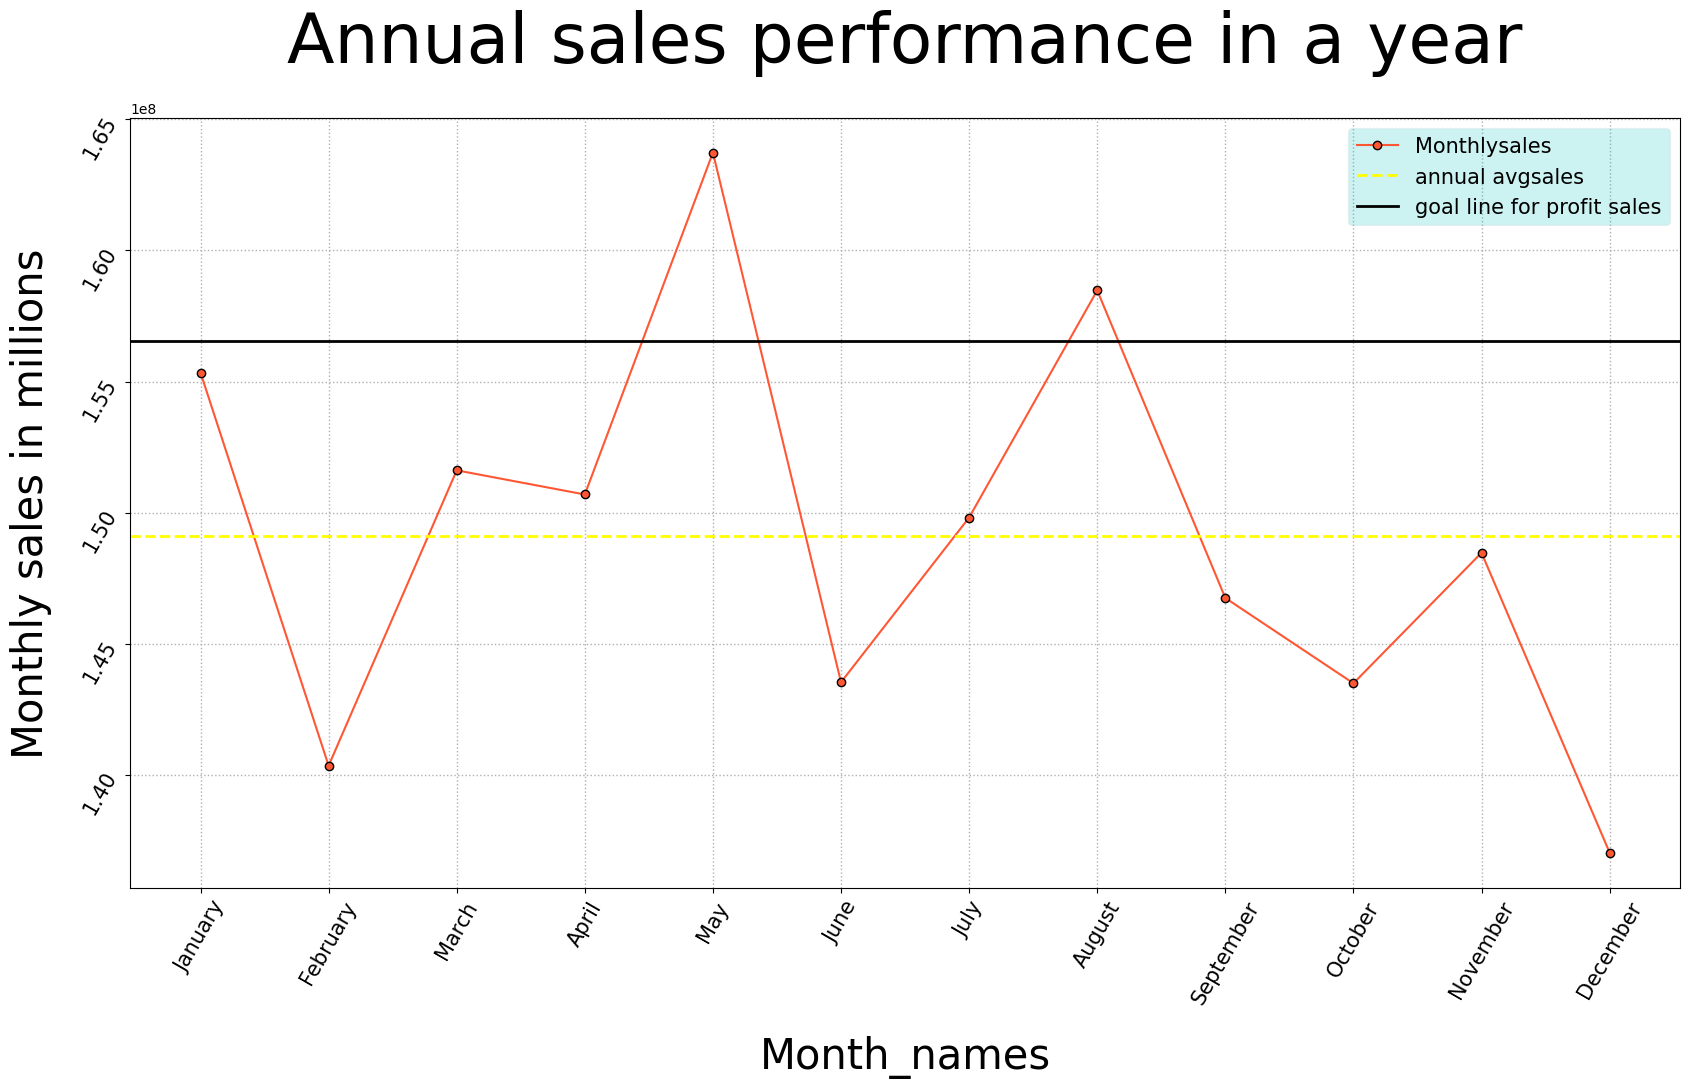

In [100]:
plt.figure(figsize =(20,10))

plt.plot(monthname , monthlysales, marker = "o" , color = "#FF5733" , markeredgecolor = "black" , label = "Monthlysales")



plt.axhline(y = avgsales ,linestyle='dashed',c='yellow',lw=2,ms=15 , label = "annual avgsales")
plt.axhline(y = goal_line ,linestyle='-',c='black',lw=2,ms=15 , label = "goal line for profit sales")
plt.title("Annual sales performance in a year" , pad = 40 , size = 50)

plt.xlabel("Month_names" , labelpad = 20, size = 30 )
plt.ylabel("Monthly sales in millions" , labelpad = 20 , size = 30 )

plt.xticks(size = 15 ,rotation = 60)
plt.yticks(size = 15 ,rotation = 60)

plt.legend(bbox_to_anchor=(1,1),fontsize=15,facecolor='c',framealpha=0.2,fancybox=True)
plt.grid(axis='both',ls='dotted',lw=1)